In [1]:
import argoverse
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from argoverse.utils.cv2_plotting_utils import plot_bbox_polygon_cv2

#set root_dir to the correct path to your dataset folder
root_dir =  '../argoverse-tracking/sample/'

argoverse_loader = ArgoverseTrackingLoader(root_dir)

Bad val 'GTKCairo' on line #4
	"backend: GTKCairo
"
	in file "/Users/aerinkim/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'gtkcairo': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [2]:
log_id = 'c6911883-1843-3727-8eaa-41dc8cda8993'
idx = 77
camera = argoverse_loader.CAMERA_LIST[0]

import argoverse.visualization.visualization_utils as viz_util
argoverse_data = argoverse_loader.get(log_id)

 ------------------------------------------------------------------------
 ------------------------- Ring Cameras ---------------------------------
 ------------------------------------------------------------------------



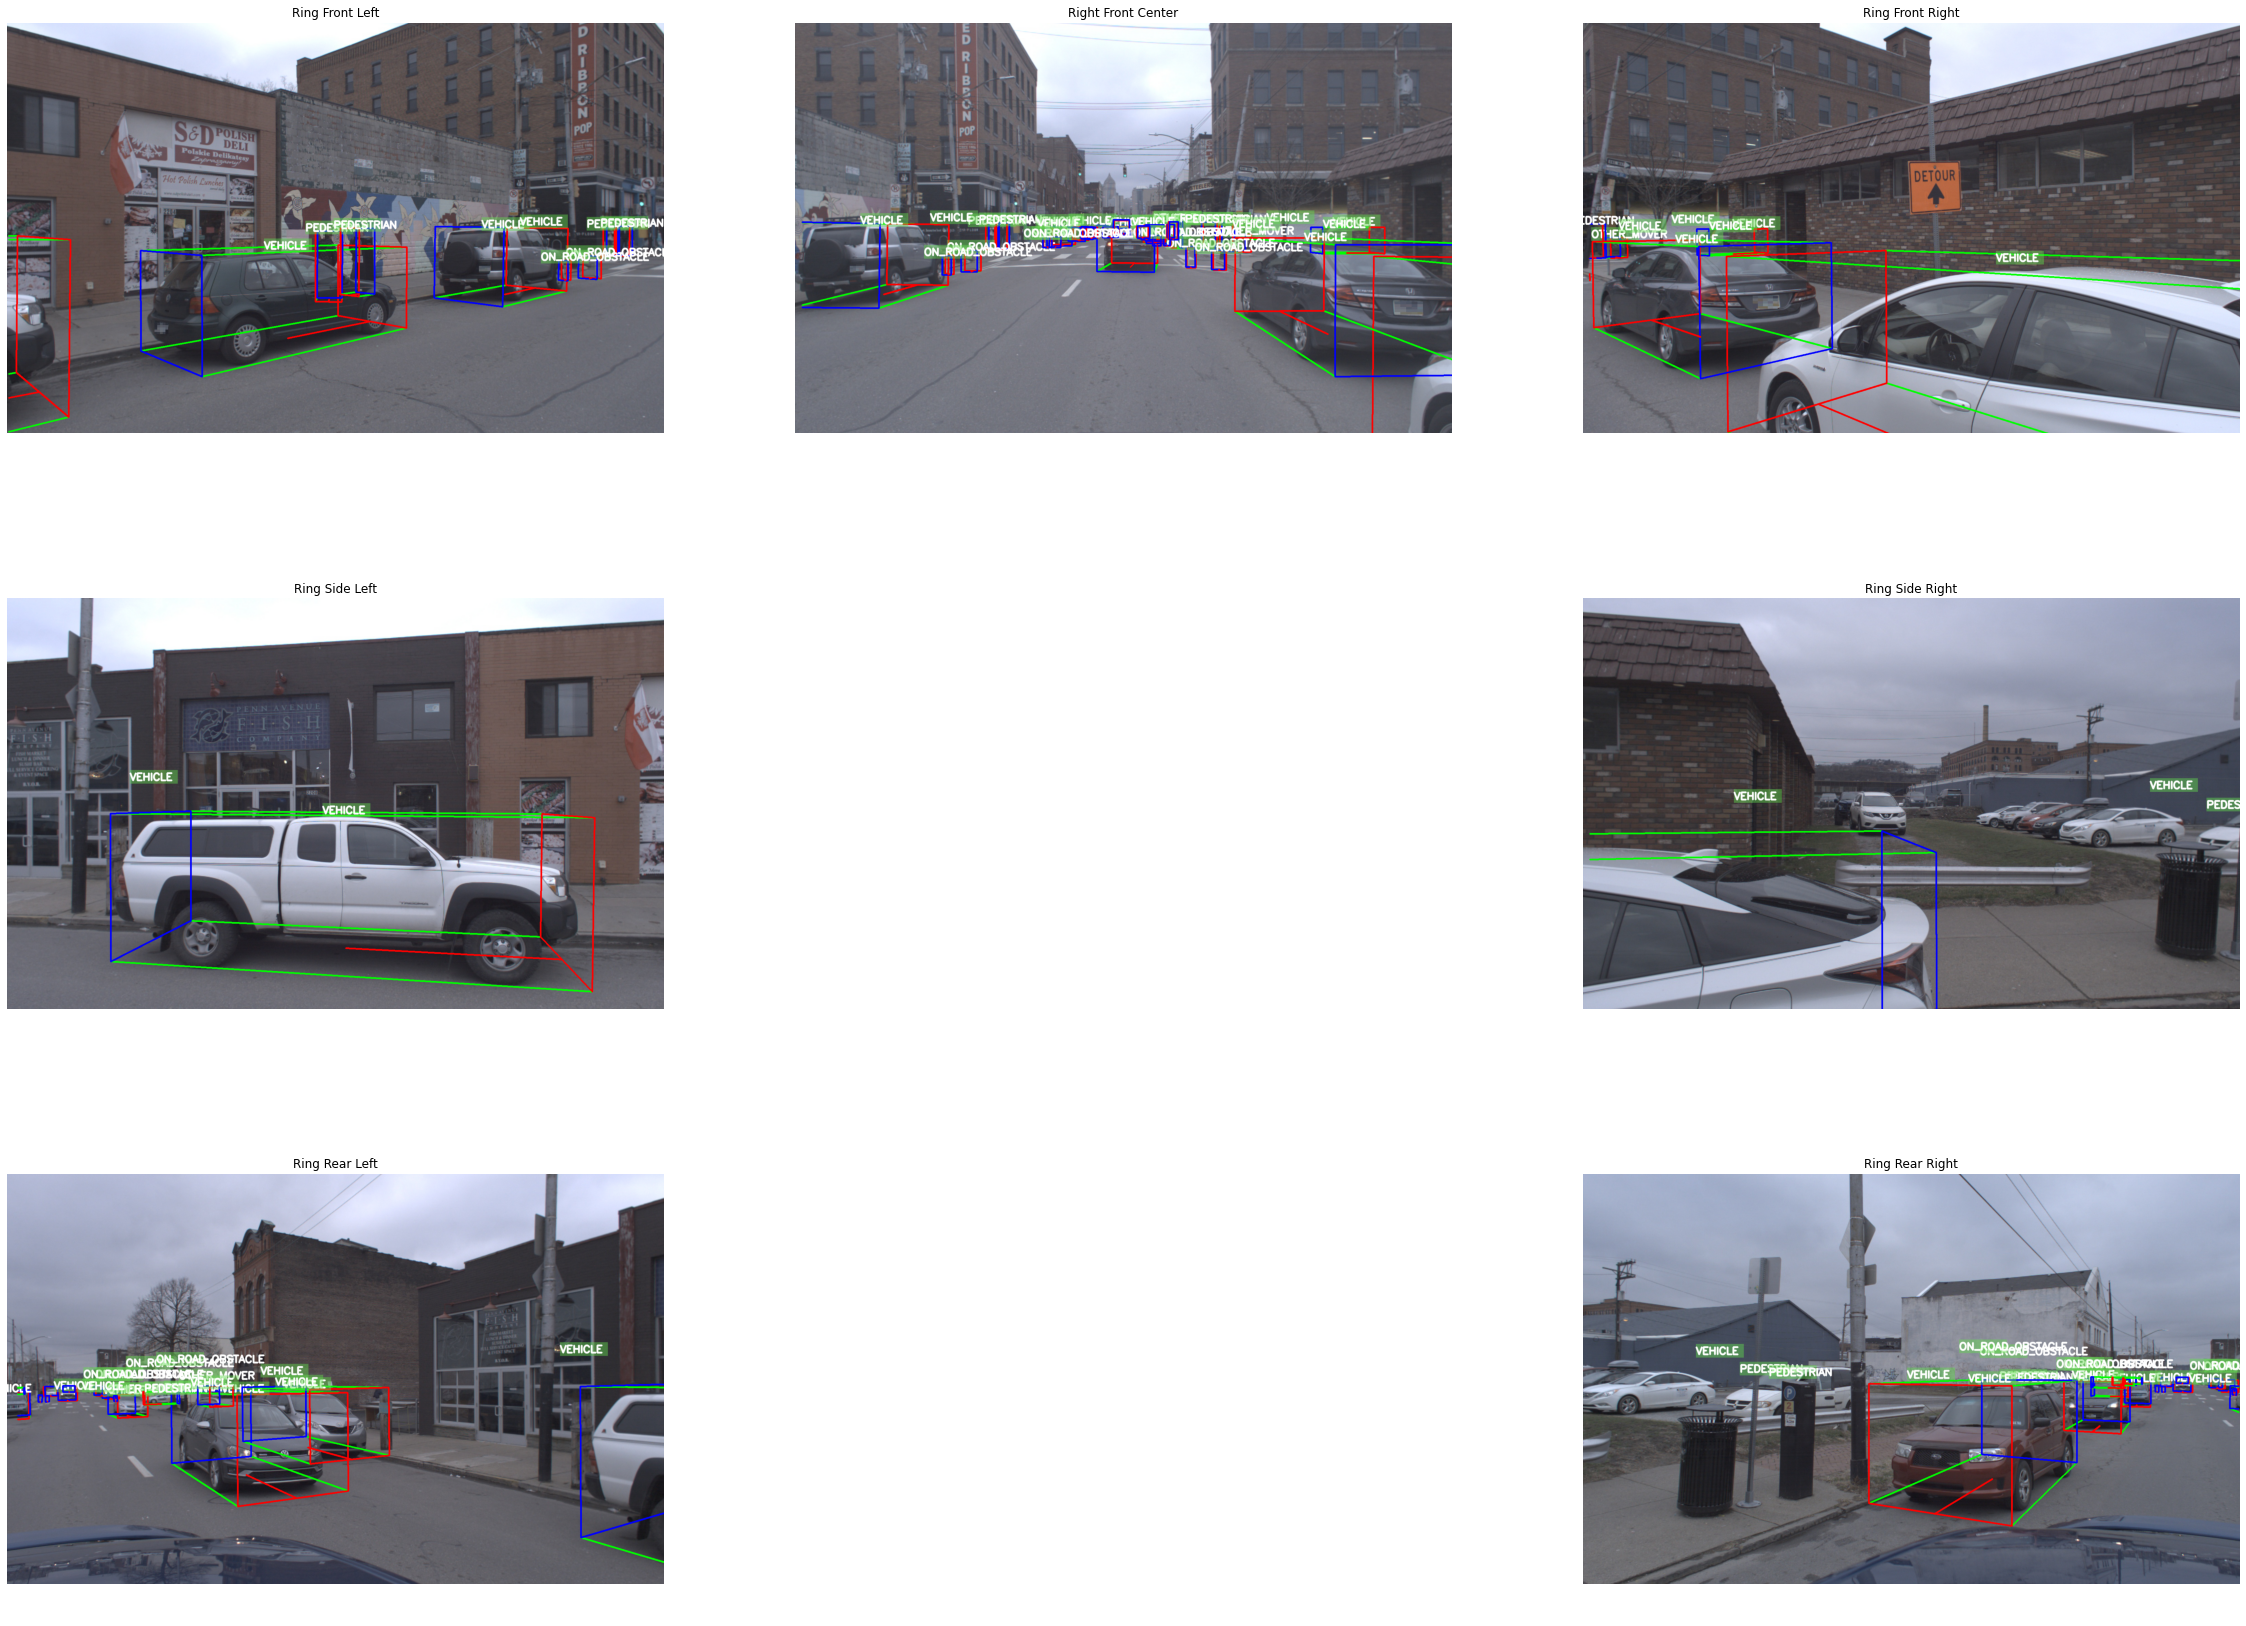

In [3]:
print(' ------------------------------------------------------------------------')
print(' ------------------------- Ring Cameras ---------------------------------')
print(' ------------------------------------------------------------------------\n')

f,ax = viz_util.make_grid_ring_camera(argoverse_data,idx)
plt.show()

In [4]:
img = argoverse_data.get_image_sync(idx, "ring_front_left")

In [5]:
img

Array([[[231, 238, 255],
        [231, 238, 255],
        [231, 238, 254],
        ...,
        [222, 232, 255],
        [221, 231, 255],
        [222, 229, 255]],

       [[229, 238, 255],
        [229, 238, 255],
        [229, 238, 253],
        ...,
        [222, 232, 255],
        [221, 231, 255],
        [221, 231, 255]],

       [[229, 237, 255],
        [229, 238, 255],
        [230, 239, 255],
        ...,
        [220, 232, 255],
        [221, 231, 255],
        [221, 231, 255]],

       ...,

       [[ 84,  87,  94],
        [ 84,  87,  94],
        [ 84,  87,  94],
        ...,
        [103, 103, 113],
        [104, 104, 114],
        [104, 104, 114]],

       [[ 86,  89,  96],
        [ 86,  89,  96],
        [ 86,  89,  96],
        ...,
        [103, 103, 113],
        [104, 104, 114],
        [105, 105, 115]],

       [[ 87,  90,  97],
        [ 87,  90,  97],
        [ 87,  90,  97],
        ...,
        [102, 102, 112],
        [104, 104, 114],
        [104, 104, 114]]

## R & t

In [6]:
current_pose = argoverse_data.get_pose(idx)

In [7]:
current_pose.__dict__

{'rotation': array([[-7.33396119e-01,  6.79801005e-01, -8.52294657e-04],
        [-6.79777593e-01, -7.33359185e-01,  9.31287411e-03],
        [ 5.70586307e-03,  7.40939654e-03,  9.99956271e-01]]),
 'translation': array([2607.12724975, 1216.04049711,   15.65026279]),
 'transform_matrix': array([[-7.33396119e-01,  6.79801005e-01, -8.52294657e-04,
          2.60712725e+03],
        [-6.79777593e-01, -7.33359185e-01,  9.31287411e-03,
          1.21604050e+03],
        [ 5.70586307e-03,  7.40939654e-03,  9.99956271e-01,
          1.56502628e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])}

## Camera Calibration 

In [8]:
calib = argoverse_data.get_calibration(camera)

In [9]:
calib

In [ ]:
# Calibration class from https://github.com/argoai/argoverse-api/blob/master/argoverse/utils/calibration.py

class Calibration:
    """Calibration matrices and utils.

    3d XYZ are in 3D egovehicle coord.
    2d box xy are in image coord, normalized by width and height
    Point cloud are in egovehicle coord

    ::

       xy_image = K * [R|T] * xyz_ego

       xyz_image = [R|T] * xyz_ego

       image coord:
        ----> x-axis (u)
       |
       |
       v y-axis (v)

    egovehicle coord:
    front x, left y, up z
    """

    def __init__(self, camera_config: CameraConfig, calib: Dict[str, Any]) -> None:
        """Create a Calibration instance.

        Args:
            camera_config: A camera config
            calib: Calibration data
        """
        self.camera_config = camera_config

        self.calib_data = calib

        self.extrinsic = get_camera_extrinsic_matrix(calib["value"])
        self.R = self.extrinsic[0:3, 0:3]
        self.T = self.extrinsic[0:3, 3]

        self.K = get_camera_intrinsic_matrix(calib["value"])

        self.cu = self.calib_data["value"]["focal_center_x_px_"]
        self.cv = self.calib_data["value"]["focal_center_y_px_"]
        self.fu = self.calib_data["value"]["focal_length_x_px_"]
        self.fv = self.calib_data["value"]["focal_length_y_px_"]

        self.bx = self.K[0, 3] / (-self.fu)
        self.by = self.K[1, 3] / (-self.fv)

        self.d = camera_config.distortion_coeffs

        self.camera = calib["key"][10:]


In [10]:
calib.K

array([[1.40276792e+03, 0.00000000e+00, 9.81742208e+02, 0.00000000e+00],
       [0.00000000e+00, 1.40276792e+03, 6.10761766e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [11]:
calib.R

array([[-6.46945467e-03, -9.99979060e-01,  1.61224039e-04],
       [-6.42023858e-03, -1.19687779e-04, -9.99979383e-01],
       [ 9.99958462e-01, -6.47035639e-03, -6.41932982e-03]])

In [12]:
calib.T

array([ 0.00722636,  1.37169865, -1.61536279])

## Point Cloud

 ------------------------------------------------------------------------
 ------------------------- Point cloud ---------------------------------
 ------------------------------------------------------------------------



(-10.0, 10.0, -10.0, 10.0)

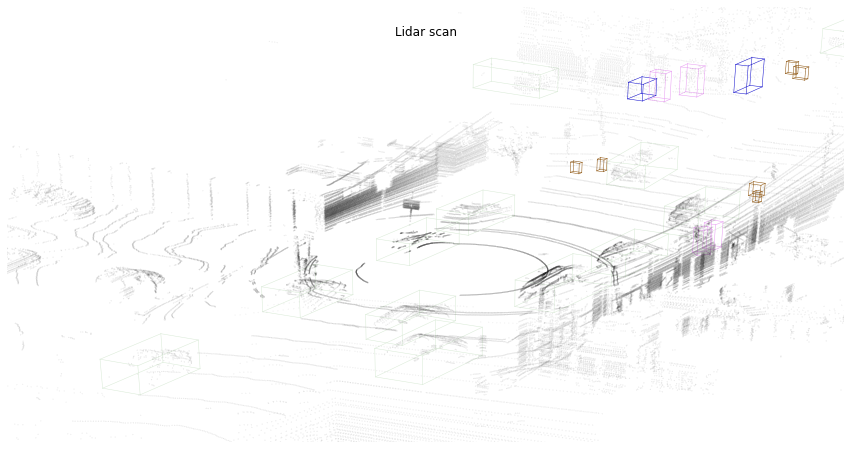

In [13]:
print(' ------------------------------------------------------------------------')
print(' ------------------------- Point cloud ---------------------------------')
print(' ------------------------------------------------------------------------\n')

f2 = plt.figure(figsize=(15, 8))
ax2 = f2.add_subplot(111, projection='3d')  
   
viz_util.draw_point_cloud(ax2, 'Lidar scan',argoverse_data,idx)
ax2.axis('off')

In [14]:
pc = argoverse_data.get_lidar(idx)

In [15]:
pc # pc means pointcloud.

array([[  1.1631176 ,  -2.0473778 ,   0.63082206],
       [  1.1099802 , -29.554214  ,   1.077687  ],
       [ -0.59712434, -18.413982  ,   1.0535564 ],
       ...,
       [  0.09627151,   5.6635056 ,  -0.11604679],
       [ -0.11527956,   5.399938  ,   0.4261515 ],
       [ -1.6434163 ,  11.127666  ,   1.7371817 ]], dtype=float32)

In [16]:
pc.size

278322

In [17]:
pc.shape

(92774, 3)

In [18]:
# Convert Cartesian coordinates to Homogeneous.
calib.cart2hom(pc)

array([[  1.16311765,  -2.04737782,   0.63082206,   1.        ],
       [  1.10998023, -29.55421448,   1.07768703,   1.        ],
       [ -0.59712434, -18.41398239,   1.05355644,   1.        ],
       ...,
       [  0.09627151,   5.66350555,  -0.11604679,   1.        ],
       [ -0.11527956,   5.39993811,   0.42615151,   1.        ],
       [ -1.64341629,  11.12766647,   1.73718166,   1.        ]])

In [19]:
calib.cart2hom(pc).shape

(92774, 4)

In [20]:
calib.extrinsic # [R|t] (3,3)|(3,1)

array([[-6.46945467e-03, -9.99979060e-01,  1.61224039e-04,
         7.22636111e-03],
       [-6.42023858e-03, -1.19687779e-04, -9.99979383e-01,
         1.37169865e+00],
       [ 9.99958462e-01, -6.47035639e-03, -6.41932982e-03,
        -1.61536279e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [21]:
calib.extrinsic.shape

(4, 4)

### Let's see if the manual calculation matches with `calib.project_ego_to_image` method.

In [ ]:
# argoverse class method from https://github.com/argoai/argoverse-api/blob/master/argoverse/utils/calibration.py

    def project_ego_to_image(self, pts_3d_ego: np.array) -> np.ndarray:
        """Project egovehicle coordinate to image.

        Args:
            pts_3d_ego: nx3 points in egovehicle coord

        Returns:
            nx3 points in image coord + depth
        """

        uv_cam = self.project_ego_to_cam(pts_3d_ego)
        return self.project_cam_to_image(uv_cam)


In [47]:
calib.project_ego_to_image(pc) #(93667, 3)

array([[-5.49916071e+03, -1.71190769e+03, -4.43095651e-01],
       [-1.28119812e+05, -6.58004165e+02, -3.21120403e-01],
       [-1.13253088e+04,  3.94208385e+02, -2.10008043e+00],
       ...,
       [ 6.08476783e+03, -7.30168586e+02, -1.55499524e+00],
       [ 5.25893926e+03, -1.39403699e+02, -1.76831269e+00],
       [ 5.64493928e+03,  7.60290695e+02, -3.34186233e+00]])

In [48]:
# Let's calculate it from scratch.
# Ego = world. 

In [49]:
# 1. World coordinates →  Camera coordinates
# Ocamera = [R|t] * Oworld
cam = calib.extrinsic.dot(calib.cart2hom(pc).transpose())

In [50]:
cam

array([[  2.04713828,  29.55381475,  18.42485609, ...,  -5.65680213,
         -5.39178417, -11.10929501],
       [  0.73366715,   0.29044479,   0.32420154, ...,   1.48644711,
          0.94564974,  -0.35622792],
       [ -0.44309565,  -0.3211204 ,  -2.10008043, ...,  -1.55499524,
         -1.76831269,  -3.34186233],
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ]])

In [51]:
cam.shape

(4, 92774)

In [52]:
cam.T[:,0:3]

array([[  2.04713828,   0.73366715,  -0.44309565],
       [ 29.55381475,   0.29044479,  -0.3211204 ],
       [ 18.42485609,   0.32420154,  -2.10008043],
       ...,
       [ -5.65680213,   1.48644711,  -1.55499524],
       [ -5.39178417,   0.94564974,  -1.76831269],
       [-11.10929501,  -0.35622792,  -3.34186233]])

In [61]:
cam_final = cam.T[:,0:3]

In [62]:
# 2. Camera coordinates → Image coordinate
# Oimage = K * Ocamera
uv = calib.K.dot(calib.cart2hom(cam_final).T)

In [63]:
uv

array([[ 2.43665419e+03,  4.11418856e+04,  2.37840594e+04, ...,
        -9.46178499e+03, -9.29944904e+03, -1.88646099e+04],
       [ 7.58538853e+02,  2.11298562e+02, -8.27869313e+02, ...,
         1.13540867e+03,  2.46509330e+02, -2.54078683e+03],
       [-4.43095651e-01, -3.21120403e-01, -2.10008043e+00, ...,
        -1.55499524e+00, -1.76831269e+00, -3.34186233e+00]])

In [64]:
uv.shape

(3, 92774)

In [65]:
uv[0:2,:] /= uv[2,:]

In [66]:
uv.T

array([[-5.49916071e+03, -1.71190769e+03, -4.43095651e-01],
       [-1.28119812e+05, -6.58004165e+02, -3.21120403e-01],
       [-1.13253088e+04,  3.94208385e+02, -2.10008043e+00],
       ...,
       [ 6.08476783e+03, -7.30168586e+02, -1.55499524e+00],
       [ 5.25893926e+03, -1.39403699e+02, -1.76831269e+00],
       [ 5.64493928e+03,  7.60290695e+02, -3.34186233e+00]])

In [67]:
# Does it match?
calib.project_ego_to_image(pc) == uv.T 

# Yes!

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])